# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent? 

In [1]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
df = pd.read_csv("data/Q1_clean.csv", low_memory=False)

### Pt 1

In [4]:
# average prices and scores by neighbourhood
df.groupby(['Neighbourhood '], as_index=False).mean(numeric_only=True)

,Neighbourhood,Price,Review Scores Rating
0,Bronx,75.276498,91.654378
1,Brooklyn,127.747378,92.363497
2,Manhattan,183.664286,91.801496
3,Queens,96.857233,91.549057
4,Staten Island,146.166667,90.843750


Manhattan is the most expensive borough on average, followed by Staten Island, the least expensive is Queens. 

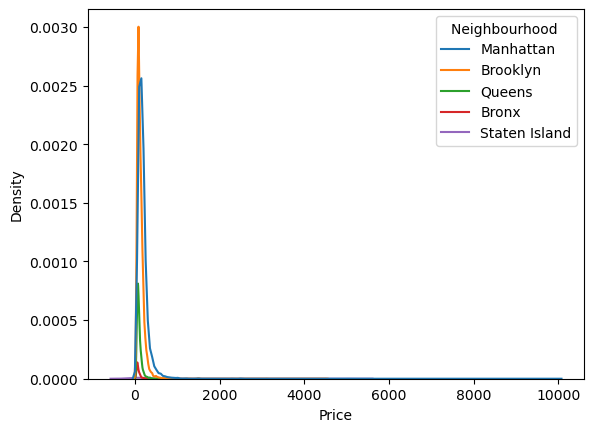

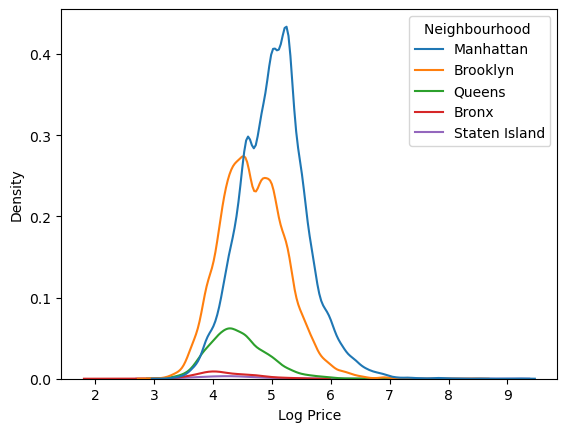

In [5]:
# kernel density plot price and log price, grouped by neighbourhood

df['Log Price'] = np.log(df['Price'])

sns.kdeplot(data=df, x='Price', hue='Neighbourhood ')
plt.show()

sns.kdeplot(data=df, x='Log Price', hue='Neighbourhood ')
plt.show()

### Pt 2

In [6]:
# set y as Price 
y = df['Price']

# regress on neighbourhood dummies
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

# run regression
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

print(reg.feature_names_in_)
print(reg.coef_)

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']
[ 75.2764977  127.74737834 183.66428632  96.8572327  146.16666667]


The coefficients are equal to the average price per borough calculated earlier. 

### Pt 3

In [3]:
# set y as Price 
y = df['Price']

# regress on neighbourhood dummies
X = pd.get_dummies(df['Neighbourhood '], dtype='int',drop_first = True)

# run regression
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True).fit(X,y)

print(reg.feature_names_in_)
print(reg.coef_)
print(reg.intercept_)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island']
[ 52.47088065 108.38778863  21.58073501  70.89016897]
75.27649769585337


When you have an intercept in the model, you have to drop the first dummy category. 
The coefficients in part 2 are equal to the intercept from pt 3 plus the coefficients from pt 3, because it is the same thing shifted over one dummy category. 

### Pt 4

In [16]:
# split into 80/20 training and test set
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.loc[:,['Neighbourhood ','Review Scores Rating']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

# get dummies 
X_train = pd.concat([pd.get_dummies(X_train['Neighbourhood '], dtype='int'),X_train['Review Scores Rating']],axis=1)
X_test = pd.concat([pd.get_dummies(X_test['Neighbourhood '], dtype='int'),X_test['Review Scores Rating']],axis=1)

In [17]:
# regression of price

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

# get coefficients 
print(reg.feature_names_in_)
print(reg.coef_)

# get R2 and RMSE
y_hat = reg.predict(X_test)
print(reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print(rmse) # RMSE

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island'
 'Review Scores Rating']
[-17.26139174  32.18088846  89.42102023   4.05020819  61.57639312
   1.03225688]
0.06701086106947296
125.01092061382933


The R^2 value on the test data for this model is approximately 0.067. \
The RMSE on the test data for this model is approximately 125.0109. \
The coefficient for Review Scores Rating is 1.0323. \
The most expensive place to rent would be a 100 rated property in Manhattan for about 100(1.0323) + 1(89.4210) = about 192.651, so it would be about 192.65 dollars a night. 

### Pt 5

In [14]:
# split into 80/20 training and test set
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.loc[:,['Neighbourhood ','Review Scores Rating','Room Type']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

# get dummies 
X_train = pd.concat([pd.get_dummies(X_train['Neighbourhood '], dtype='int'),X_train['Review Scores Rating'], pd.get_dummies(X_train['Room Type'], dtype='int')],axis=1)
X_test = pd.concat([pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Room Type'], dtype='int')],axis=1)

In [15]:
# regression of price

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

# get coefficients 
print(reg.feature_names_in_)
print(reg.coef_)

# get R2 and RMSE
y_hat = reg.predict(X_test)
print(reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print(rmse) # RMSE

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island'
 'Review Scores Rating' 'Entire home/apt' 'Private room' 'Shared room']
[-13.02276464  10.37845573  53.69330386  -6.83332984  50.0030217
   0.62691227 110.61781998   3.10134084 -19.500474  ]
0.22035348129282328
114.27692123130632


The R^2 value on the test data for this model is approximately 0.2204. \
The RMSE on the test data for this model is approximately 114.2769. \
The coefficient for Review Scores Rating is 0.6269. \
The most expensive place to rent would be a 100 rated entire home / apt in Manhattan for about 100(0.6269) + 1(53.6933) + 1(110.6178) = about 227.0011, so it would be about 227 dollars a night. 

### Pt 6

From part 4 to part 5, the coefficient for Review Scores Rating changes from 1.0323 to 0.6269. This means that in the pt 4 model, a 1 point increase in Review Scores Rating results in a 1.0323 dollar increase in predicted price. And in the pt 5 model, a 1 point increase in Review Scores Rating results in a 0.6269 dollar increase in predicted price. This is because the model in part 4 has fewer variables (no room type) which means that in pt 5 some of the variation in price can now be explained by the coefficients on room type. Thus in pt 5, Review Scores Rating determines less variation in price, so its coefficent decreases. 

### Pt 7

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

### Pt 1

In [51]:
# load data 
trial_df = pd.read_csv("data/pretrial_data.csv",low_memory=False)

In [52]:
# subset relevant variables 
vars = ['held_wo_bail', 'race', 'sex', 'is_poor', 'prior_F', 'case_type']
t_df = trial_df.loc[:,vars]

In [53]:
# drop nans
t_df = t_df.dropna()

### Pt 2

In [54]:
# Black dummy variable 
t_df['black'] = t_df['race'] == 'B'
t_df['black'] = t_df['black'].astype(int)

### Pt 3

In [29]:
# run regression
from sklearn import linear_model

y = t_df['held_wo_bail']
X = t_df.loc[:,['black']]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

# get coefficients 
print(reg.feature_names_in_)
print(reg.coef_)

# get R2 
print(reg.score(X,y)) # R2

['black']
[0.30540143]
-0.16612105659228926


It is 30% more likely for a black person to be held without bail. 
The R^2 on the entire sample (no train/test split) is -0.166 which means this model is worse at predicting than using the mean. 

### Pt 4

In [55]:
# make all dummies
sex_dum = pd.get_dummies(t_df['sex'],dtype='int').rename({'F':'female','M':'male'}, axis=1)
case_type_dum = pd.get_dummies(t_df['case_type'],dtype='int').rename({'F':'felony','M':'misdemeanor','I':'infraction','S':'special_case'}, axis=1)

# add dummies into df 
t_df = pd.concat([t_df,sex_dum,case_type_dum],axis=1)

# drop categorical vars 
t_df = t_df.drop(['race','sex','case_type'],axis = 1)

In [57]:
# black and sex
vars = ['black','female','male']

y = t_df['held_wo_bail']
X = t_df.loc[:,vars]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

# get coefficients 
print(reg.feature_names_in_)
print(reg.coef_)

# get R2 
print(reg.score(X,y)) # R2

['black' 'female' 'male']
[0.06111762 0.16735214 0.26917821]
0.016049279662710525


In [58]:
# black and sex and is_poor
vars = ['black','female','male','is_poor']

y = t_df['held_wo_bail']
X = t_df.loc[:,vars]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

# get coefficients 
print(reg.feature_names_in_)
print(reg.coef_)

# get R2 
print(reg.score(X,y)) # R2

['black' 'female' 'male' 'is_poor']
[0.03452532 0.07870068 0.19401826 0.18550336]
0.059019899423822464


In [59]:
# black and sex and is_poor and prior_F
vars = ['black','female','male','is_poor','prior_F']

y = t_df['held_wo_bail']
X = t_df.loc[:,vars]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

# get coefficients 
print(reg.feature_names_in_)
print(reg.coef_)

# get R2 
print(reg.score(X,y)) # R2

['black' 'female' 'male' 'is_poor' 'prior_F']
[0.02487868 0.067477   0.16554344 0.16751732 0.02624561]
0.10098281342018356


In [60]:
# black and sex and is_poor and prior_F and case_type
vars = ['black','female','male','is_poor','prior_F','felony','misdemeanor','infraction','special_case']

y = t_df['held_wo_bail']
X = t_df.loc[:,vars]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

# get coefficients 
print(reg.feature_names_in_)
print(reg.coef_)

# get R2 
print(reg.score(X,y)) # R2

['black' 'female' 'male' 'is_poor' 'prior_F' 'felony' 'misdemeanor'
 'infraction' 'special_case']
[ 0.01846038  0.07351127  0.15823225  0.07342602  0.01639666  0.32498056
 -0.0965479  -0.18390183  0.18721269]
0.2773936155470892


As you include more variables in the regression, the coefficient on 'black' decreases, from 0.3 in pt 3 to 0.01 in the final regression. This is because some of the variation in held_wo_bail is determined by the other variables. 

### Pt 5

In [67]:
from sklearn.preprocessing import PolynomialFeatures
t_df['other'] = (t_df['black']==False).astype(int)
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(t_df.loc[:,['black','other','male','female']]) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names).loc[:,['black male','black female','other male','other female']] # Create a new, expanded dataframe
zdf.head()

,black male,black female,other male,other female
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [68]:
y = t_df['held_wo_bail']
X = zdf

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

# get coefficients 
print(reg.feature_names_in_)
print(reg.coef_)

# get R2 
print(reg.score(X,y)) # R2

['black male' 'black female' 'other male' 'other female']
[0.34772182 0.17461788 0.25602444 0.19839786]
0.019258013319620515


According to this regression, black females actually are the least likely to be held without bail with a probability of 0.17, and black males are the most likely to be held without bail, with a probability of 0.35. The others fall between these, with other females being held without bail with a predicted probability of 0.2, and other males being held with a probability of 0.26. 

### Pt 6

One concern I have is that every data-driven model like this one is based on past cases. If we are trying to automate something in order make it unbiased, but the original data we base the model off of is already biased in some way, then the predictions the model will make will continue to be biased. In this case, the justice system will continue to be biased. 

Also, as we have discussed, no model is perfect, and thus making decisions based on only data-driven and automated tools will not be able to account for everything, especially complicated conditions or unforseen circumstances. Thus I think that models can be made and interpreted with a grain of salt in order to make decisions, not taken as 100% or a word of law. 

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.** 
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?